<a href="https://colab.research.google.com/github/prachimudholkar04/ML_classification_regression_clustering/blob/main/ML__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown

 

!gdown 1np02S4302zU__v7lzhOc4Ab40-OXDYFx

Downloading...
From: https://drive.google.com/uc?id=1np02S4302zU__v7lzhOc4Ab40-OXDYFx
To: /content/brainstroke.csv
100% 317k/317k [00:00<00:00, 101MB/s]


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

#data pre-processing
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,f1_score,roc_auc_score, recall_score, classification_report, roc_curve, precision_recall_curve, auc,confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, silhouette_score

#Regeression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from scipy.stats import randint

# Feature Ranking
from sklearn.ensemble import  ExtraTreesClassifier

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Clustering
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

#Visualizing R2 value for analysis
from yellowbrick.regressor import ResidualsPlot


In [ ]:
path = "/content/brainstroke.csv"
df = pd.read_csv(path)

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop(["id"], axis = 1,inplace= True)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df = df.dropna()

# Exploratory Data Analysis

##Plotting the chart of Target column

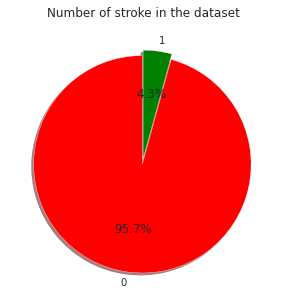

In [ ]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["red","green"]
explode = (0.05,0) 
 
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

## Chart for the work type column

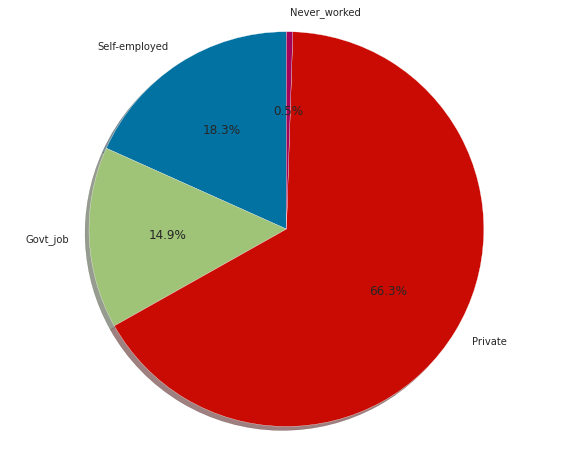

In [ ]:
self_employed = df['work_type'].value_counts()['Self-employed']
gov_job = df['work_type'].value_counts()['Govt_job']
private = df['work_type'].value_counts()['Private']
never_work= df['work_type'].value_counts()['Never_worked']

labels = ['Self-employed', 'Govt_job','Private','Never_worked']
sizes = [self_employed, gov_job,private,never_work]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

## Male Female ratio for stroke

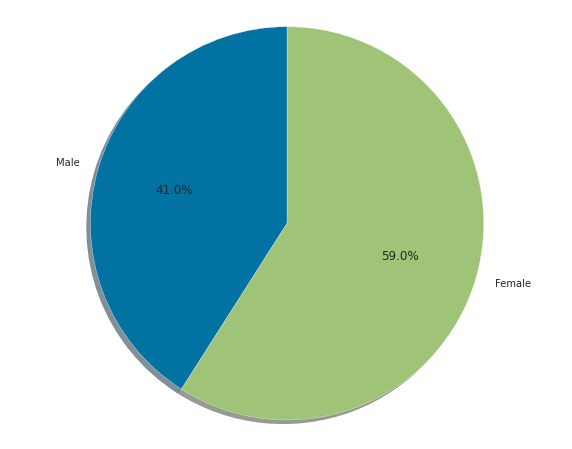

In [ ]:
male = df['gender'].value_counts()['Male']
female = df['gender'].value_counts()['Female']

labels = ['Male', 'Female']
sizes = [male, female]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

## Male Female ratio for healthy and stroke

In [ ]:
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

## Gender co-relation with respect to Hypertension, Residenc_type, Heart_disease

<Figure size 1224x504 with 0 Axes>

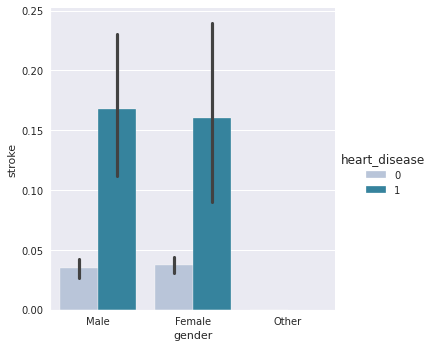

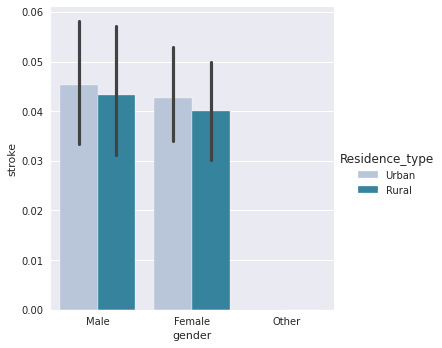

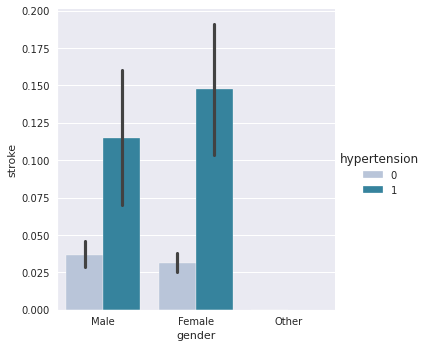

In [ ]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="PuBuGn", kind = "bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="PuBuGn", kind = "bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="PuBuGn", kind = "bar",  data=df)
plt.show()

# Encoding for categorical and numerical colmun

In [ ]:
categorical_list =df.select_dtypes(include=['object']).columns

for i in categorical_list:
  df[i] = df[i].astype('string')

categorical_list

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
encoder = OrdinalEncoder()

listcat = ['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']

for i in listcat:
  df[i] = encoder.fit_transform(df[[i]])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   float64
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   float64
 5   work_type          4909 non-null   float64
 6   Residence_type     4909 non-null   float64
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   float64
 10  stroke             4909 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 589.3 KB


In [ ]:
numerical_list =df.select_dtypes(include=['int64']).columns

for i in numerical_list:
  df[i] = df[i].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   float64
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   float64
 3   heart_disease      4909 non-null   float64
 4   ever_married       4909 non-null   float64
 5   work_type          4909 non-null   float64
 6   Residence_type     4909 non-null   float64
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   float64
 10  stroke             4909 non-null   float64
dtypes: float64(11)
memory usage: 589.3 KB


In [ ]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']

# Balancing the dataset

In [ ]:
sm = SMOTE(random_state=40)
X_oversample, y_oversample = sm.fit_resample(X, y)
X_oversample['stroke'] = y_oversample
df = X_oversample

In [ ]:
scaler = StandardScaler()

# Co-relation between target colmuns and other feature

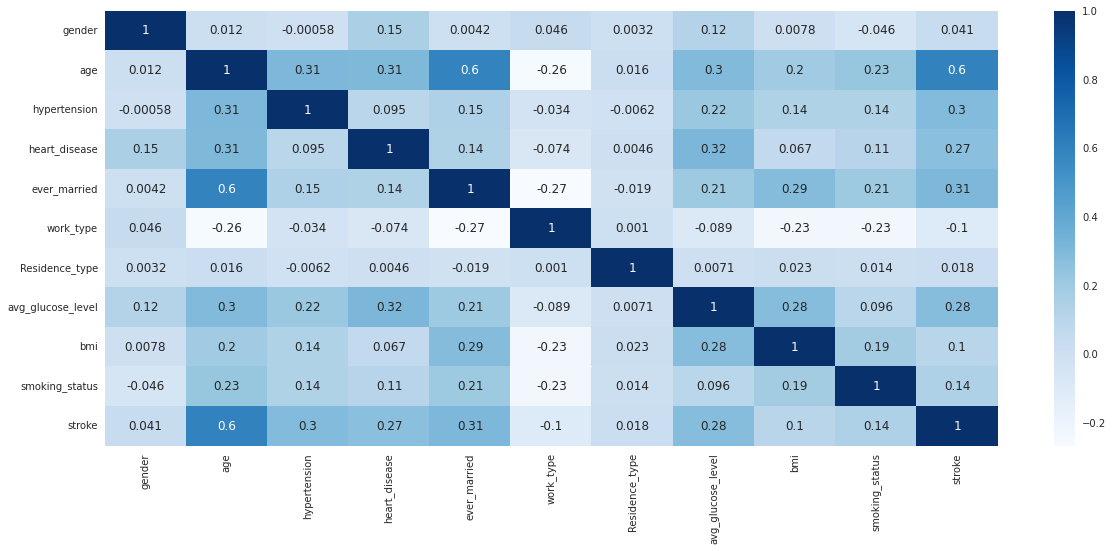

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap='Blues', annot = True)

In [ ]:
cleandf = df.to_csv("cleaneddf.csv")

#IMPORT CLEAN DATASET

In [ ]:
path = '/content/cleaneddf.csv'
df = pd.read_csv(path)
df = df.iloc[:,1:]

#CLASSIFICATION

In [ ]:
cdf = df
c_X = cdf.drop(["stroke"],axis=1)
c_y = cdf["stroke"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(c_X, c_y, test_size=0.3, random_state=40)

## Feature ranking

In [ ]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
# Create the model with 100 trees
model = ExtraTreesClassifier(n_estimators=100, 
                              random_state=0)
# Fit on training data
model.fit(c_X, c_y)

# Get feature importance
feature_importance = model.feature_importances_


std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))


Feature ranking:
1. feature 1 (0.243776)
2. feature 2 (0.117575)
3. feature 6 (0.106479)
4. feature 4 (0.104096)
5. feature 9 (0.086693)
6. feature 7 (0.081660)
7. feature 3 (0.070467)
8. feature 0 (0.069700)
9. feature 5 (0.067703)
10. feature 8 (0.051850)


## Scaling train and test data

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dtc = DecisionTreeClassifier()

model = dtc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1391
         1.0       0.95      0.96      0.95      1429

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



In [ ]:
rfc = RandomForestClassifier()

model = rfc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1391
         1.0       0.99      0.96      0.98      1429

    accuracy                           0.98      2820
   macro avg       0.98      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820



## Cross Validation for Random Forest

In [ ]:
print(cross_val_score(rfc,X, y, cv=6))

[0.95726496 0.95354523 0.95599022 0.95721271 0.95721271 0.95843521]


In [ ]:
average_cross = cross_val_score(rfc,X, y, cv=6)

In [ ]:
average_cross.mean()

0.9568139231953413

In [ ]:
#compute the feature importance
importance = rfc.feature_importances_

#sort the feature importance in descending order
indices = np.argsort(importance)[::-1]

#print out the feature importance
for i in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (i + 1, indices[i], importance[indices[i]]))

1. feature 1 (0.261223)
2. feature 2 (0.131831)
3. feature 9 (0.092538)
4. feature 6 (0.091736)
5. feature 4 (0.091125)
6. feature 7 (0.085775)
7. feature 0 (0.066561)
8. feature 5 (0.064582)
9. feature 3 (0.059979)
10. feature 8 (0.054651)


In [ ]:
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=300,height=400)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
      ]

    plt.rcParams['figure.figsize']=10,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "Purples_r", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [ ]:
def run_exp_on_feature(X_train,y_train,X_test,y_test):
    #x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2, random_state=23)
    models= [['Logistic Regression ',LogisticRegression(max_iter= 1000)],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ]

    models_score = []
    for name,model in models:

        model = model
        model.fit(X_train,y_train)
        model_pred = model.predict(X_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(X_test)))

        print(name)
        print('Classification Report: ',classification_report(y_test,model.predict(X_test)))
        print('############################################')
        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=300, height=400
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    
        
    return models_score

In [ ]:
models_score = run_exp_on_feature(X_train,y_train,X_test,y_test)

[[1043  348]
 [ 315 1114]]
Logistic Regression 
Classification Report:                precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      1391
         1.0       0.76      0.78      0.77      1429

    accuracy                           0.76      2820
   macro avg       0.77      0.76      0.76      2820
weighted avg       0.76      0.76      0.76      2820

############################################


[[1202  189]
 [   9 1420]]
KNearest Neighbor 
Classification Report:                precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1391
         1.0       0.88      0.99      0.93      1429

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820

############################################


[[1304   87]
 [  56 1373]]
Decision Tree Classifier 
Classification Report:                precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1391
         1.0       0.94      0.96      0.95      1429

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820

############################################


[[1380   11]
 [  48 1381]]
Random Forest Classifier 
Classification Report:                precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1391
         1.0       0.99      0.97      0.98      1429

    accuracy                           0.98      2820
   macro avg       0.98      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820

############################################


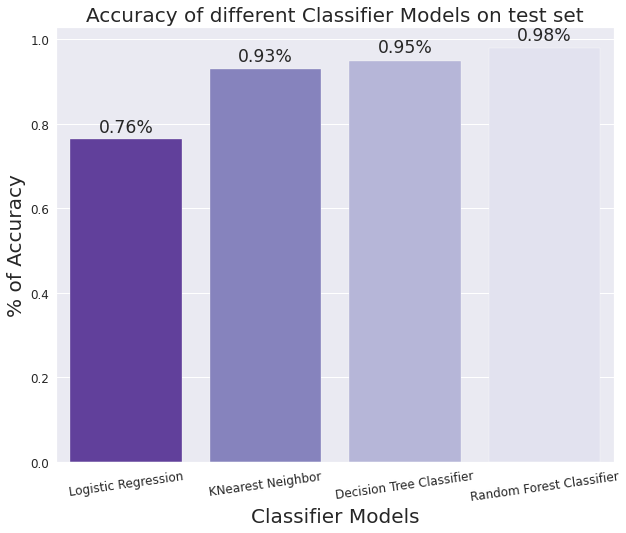

In [ ]:
hist_score(models_score)

#REGRESSION

In [ ]:
rdf = df
r_X = rdf.drop(["avg_glucose_level"],axis=1)
r_y = rdf["avg_glucose_level"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(r_X, r_y, test_size=0.3, random_state=40)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()

model = dtr.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.3293680745989618


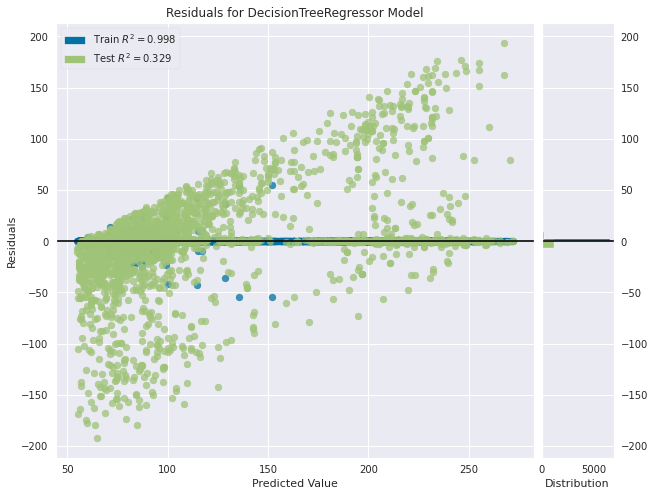

In [ ]:
visualizer = ResidualsPlot(dtr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()      

## Linear Regression

In [ ]:
lr = LinearRegression()

model = lr.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.22784325503125347


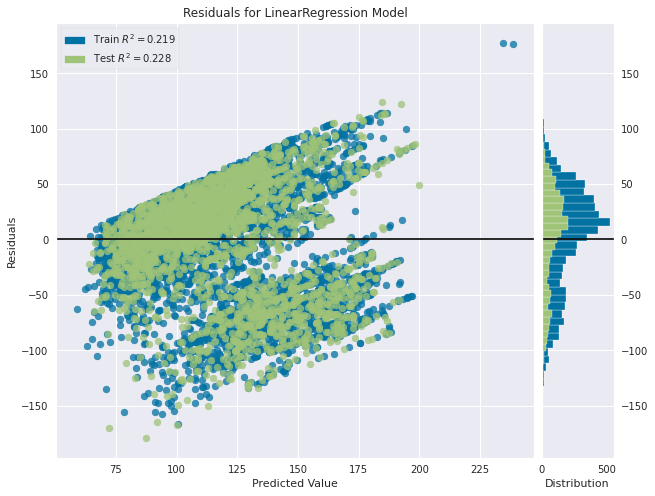

In [ ]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

## XGB Boosting

In [ ]:
xgb = XGBRegressor()

model = xgb.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

[19:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4591800288375879


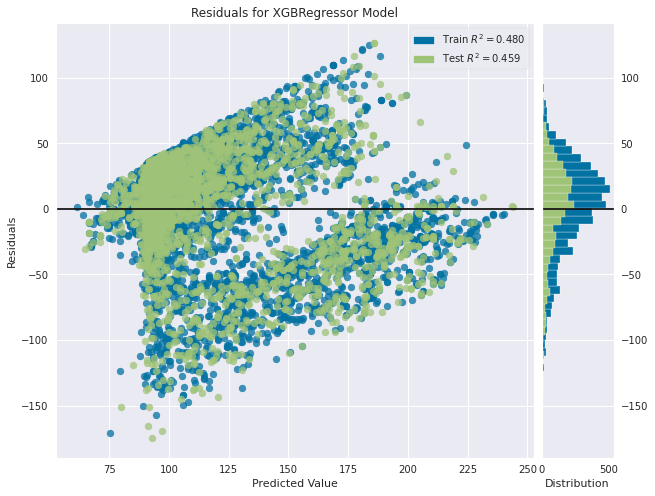

In [ ]:
visualizer = ResidualsPlot(xgb)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

#CLUSTERING

In [ ]:
clsdf = df
pca = PCA(n_components=2, random_state=40)
pca.fit(clsdf)
pcax = pca.transform(clsdf)

Text(0, 0.5, 'PC2')

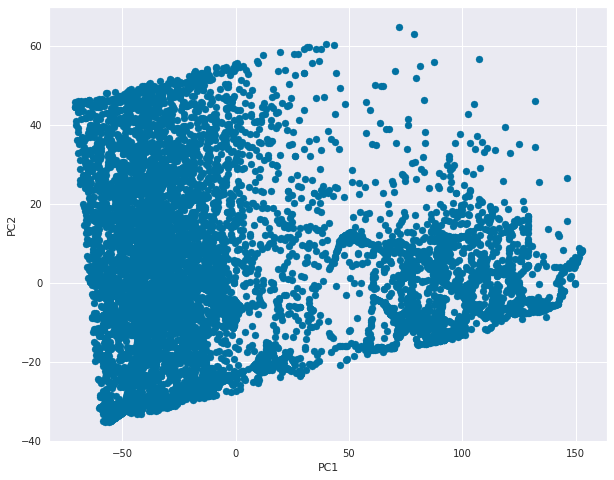

In [ ]:
plt.scatter(pcax[:,0], pcax[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

## K-means Clustering

In [ ]:
km = KMeans(n_clusters=2, random_state=40)
y_pred = km.fit_predict(pcax)
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
pcaxdf = pd.DataFrame(pcax)
pcaxdf['Cluster'] = y_pred
pcaxdf

,0,1,Cluster
0,110.108829,3.095353,1
1,-9.763501,-26.703279,0
2,50.676928,12.973393,1
3,57.301131,-15.890349,1
4,69.719848,-16.373850,1
...,...,...,...
9395,-14.623979,-28.188394,0
9396,-53.698758,1.323476,0
9397,-56.877649,2.829530,0
9398,93.100221,8.451147,1


Text(0, 0.5, 'PC2')

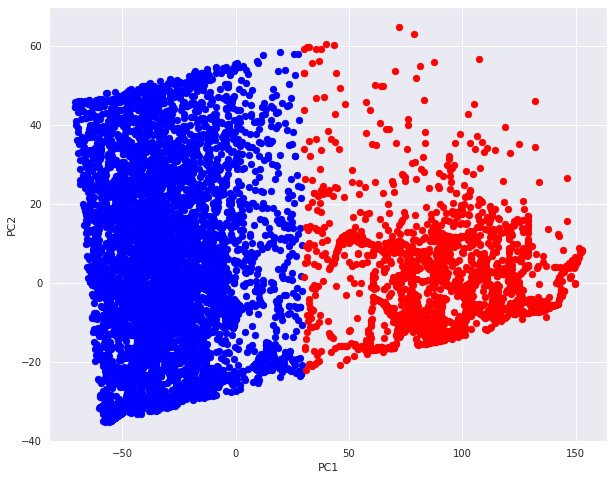

In [ ]:
df_cl1 = pcaxdf[pcaxdf.Cluster == 0]
df_cl2 = pcaxdf[pcaxdf.Cluster == 1]

plt.scatter(df_cl1[0], df_cl1[1], color = 'blue')
plt.scatter(df_cl2[0], df_cl2[1], color = 'red')

plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(pcax)
    wcss.append(kmeans.inertia_)

## The Elbow Method

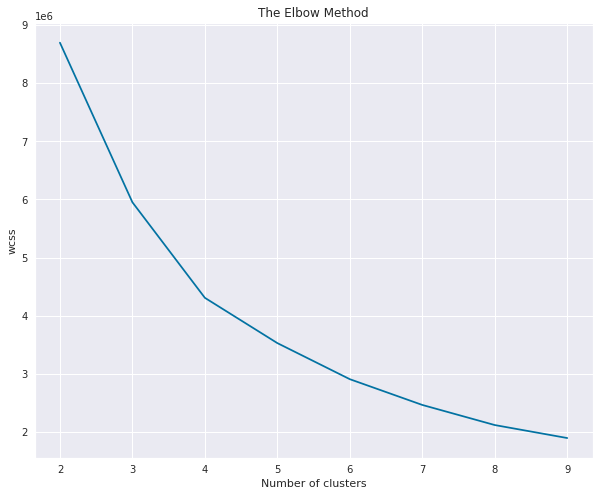

In [ ]:
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Text(0, 0.5, 'PC2')

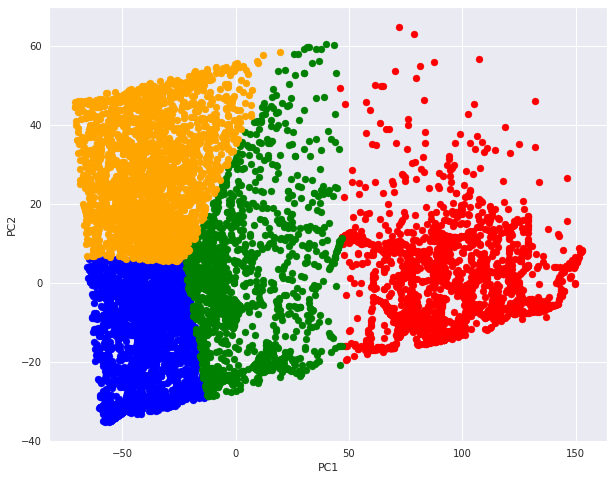

In [ ]:
km = KMeans(n_clusters=4, random_state=40)
y_pred = km.fit_predict(pcax)

pcaxdf = pd.DataFrame(pcax)
pcaxdf['Cluster'] = y_pred

df_cl1 = pcaxdf[pcaxdf.Cluster == 0]
df_cl2 = pcaxdf[pcaxdf.Cluster == 1]
df_cl3 = pcaxdf[pcaxdf.Cluster == 2]
df_cl4 = pcaxdf[pcaxdf.Cluster == 3]

plt.scatter(df_cl1[0], df_cl1[1], color = 'blue')
plt.scatter(df_cl2[0], df_cl2[1], color = 'red')
plt.scatter(df_cl3[0], df_cl3[1], color = 'green')
plt.scatter(df_cl4[0], df_cl4[1], color = 'orange')

plt.xlabel('PC1')
plt.ylabel('PC2')

## Evaluating Clusters

In [ ]:
score = silhouette_score(clsdf, kmeans.labels_, metric='euclidean')

print("Silhouette Score:", score)

Silhouette Score: 0.35043926259942915


## Creating Principle Component

In [ ]:
load = pca.components_
feature_counts = pca.n_features_
feature_list = ["PC"+str(i) for i in list(range(1, feature_counts+1))]
load_df =pd.DataFrame.from_dict(dict(zip(feature_list, load)))
load_df["feature"] = clsdf.columns.values
load_df = load_df.set_index("feature")
load_df

,PC1,PC2
feature,,
gender,0.000992,0.000709
age,0.137779,-0.989286
hypertension,0.001447,-0.004015
heart_disease,0.001681,-0.002803
ever_married,0.001740,-0.010616
work_type,-0.001717,0.010596
Residence_type,0.000066,-0.000317
avg_glucose_level,0.989821,0.139164
bmi,0.035344,-0.038116


## HeatMap for component

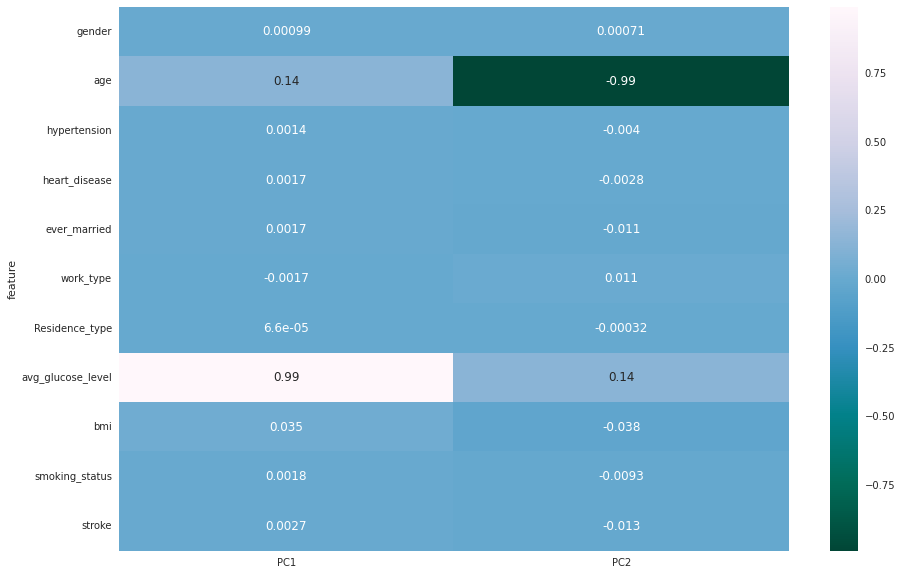

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(load_df, annot=True, cmap="PuBuGn_r")

# END :-)